# PHASE 1: Data Preprocessing

In [ ]:
# Total imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)
plt.style.use('default')
sns.set_palette('husl')

In [22]:
# Load data
df = pd.read_csv('../all_products.csv')
print(f"Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
df.head(10)

Loaded: 4702 rows, 15 columns


,name,brand,price_rub,price_kzt,seller,seller_id,seller_rating,seller_total_sold,seller_age_months,feedbacks,category,source_file,risk_level,publication_date,first_review_datetime
0,Умный тренажёр для ног бедер ягодиц,Q,846.0,5076,ВсёМаркет,250046174.0,4.3,0,28,0,тренажеры,wb_fitnes.csv,medium,2024-07-03,2024-07-10
1,Тренажер для спины и поясницы,NaN,430.0,2580,Sheikh,250001281.0,4.6,0,12,0,тренажеры,wb_fitnes.csv,low,2025-04-26,2025-05-06
2,Универсальный тренажёр Эспандер,АТМ95,798.0,4788,MERI,250079034.0,4.7,0,22,0,тренажеры,wb_fitnes.csv,low,2025-05-07,2025-05-24
3,Степпер тренажер для ног бедер и ягодиц с эспа...,EnergyFit,5008.0,30048,EnergyFit,4413375.0,4.9,58776,35,5937,тренажеры,wb_fitnes.csv,low,2023-09-25,2023-10-11
4,Металлический диск для коррекции фигуры,NaN,612.0,3672,BRB SHOP,250075919.0,4.7,0,18,0,диски для скольжения,wb_fitnes.csv,low,2025-04-30,2025-05-13
5,"Набор фитнес резинок, ленточный тренажер от 3-...",AleksTeam,959.0,5754,AleksTeam,1358048.0,4.6,0,38,0,тренажеры,wb_fitnes.csv,low,2024-09-10,2024-09-16
6,Тренажер степпер для дома,NaN,3214.0,19284,AGEEVA,3958712.0,4.6,0,47,0,тренажеры,wb_fitnes.csv,low,2024-08-04,2024-08-07
7,Виброплатформа Shake Black фитнес тренажер плю...,GESS,7041.0,42246,REAL PRICE,250076008.0,4.7,0,42,0,тренажеры,wb_fitnes.csv,low,2023-08-09,2023-08-13
8,Фитнес твистер с резинками тренажёр для ягодиц...,ATS2,990.0,5940,LaraMix,250044203.0,4.5,0,8,0,тренажеры,wb_fitnes.csv,low,2025-06-01,2025-06-11
9,Диск здоровья вращающийся с эспандерами для по...,TIDDO,989.0,5934,Мелочи для дома,250032597.0,4.5,0,13,0,тренажеры,wb_fitnes.csv,low,2025-10-09,2025-10-20


In [ ]:
# Basic info
df.info()
df.describe()
# checking all types of attributes & how many entries we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   4702 non-null   object 
 1   brand                  3833 non-null   object 
 2   price_rub              4702 non-null   float64
 3   price_kzt              4702 non-null   int64  
 4   seller                 4702 non-null   object 
 5   seller_id              2705 non-null   float64
 6   seller_rating          4702 non-null   float64
 7   seller_total_sold      4702 non-null   int64  
 8   seller_age_months      4702 non-null   int64  
 9   feedbacks              4702 non-null   int64  
 10  category               4702 non-null   object 
 11  source_file            4702 non-null   object 
 12  risk_level             4702 non-null   object 
 13  publication_date       4702 non-null   object 
 14  first_review_datetime  4702 non-null   object 
dtypes: f

,price_rub,price_kzt,seller_id,seller_rating,seller_total_sold,seller_age_months,feedbacks
count,4702.000000,4.702000e+03,2.705000e+03,4702.000000,4.702000e+03,4702.000000,4702.000000
mean,12824.750744,7.694850e+04,3.862887e+07,4.725755,3.574590e+03,24.373033,363.194598
std,36104.290288,2.166257e+05,8.874352e+07,0.165866,6.797141e+04,13.796695,6875.449090
min,0.000000,0.000000e+00,2.740000e+02,3.700000,0.000000e+00,1.000000,0.000000
25%,742.000000,4.452000e+03,2.349550e+05,4.700000,0.000000e+00,12.000000,0.000000
50%,1839.000000,1.103400e+04,1.125277e+06,4.800000,0.000000e+00,24.000000,0.000000
75%,7472.000000,4.483200e+04,4.182081e+06,4.800000,1.880000e+02,36.000000,19.000000
max,667162.000000,4.002972e+06,2.500829e+08,5.000000,3.667059e+06,48.000000,370410.000000


## Task 1.1: Data Types 

In [ ]:
# 1.1: Classify data types
classifications = {
    'Attribute': ['name', 'brand', 'price_rub', 'price_kzt', 'seller', 'seller_id', 
                  'seller_rating', 'seller_total_sold', 'seller_age_months', 'feedbacks', 
                  'category', 'source_file', 'risk_level', 'publication_date', 'first_review_datetime'],
    'Type': ['Nominal', 'Nominal', 'Continuous', 'Continuous', 'Nominal', 'Discrete',
             'Continuous', 'Discrete', 'Discrete', 'Discrete',
             'Nominal', 'Nominal', 'Ordinal', 'Continuous', 'Continuous'],
    'Reason': [
        'Product names - no order', # no order - means that the order of elements doest not matter at all
        'Brand names - no order',
        'Price with decimals',
        'Price with decimals',
        'Seller names - no order',
        'Integer IDs',
        'Rating 0-5 with decimals',
        'Count of sales',
        'Count of months',
        'Count of reviews',
        'Category labels - no order',
        'File names - no order',
        'Ordered: low < medium < high',
        'Date-time value',
        'Date-time value'
    ]
}

df_class = pd.DataFrame(classifications)
print(df_class.to_string(index=False))

# Count by type
print("\nType counts:")
print(df_class['Type'].value_counts()) # for visual bars - take it easy

            Attribute       Type                       Reason
                 name    Nominal     Product names - no order
                brand    Nominal       Brand names - no order
            price_rub Continuous          Price with decimals
            price_kzt Continuous          Price with decimals
               seller    Nominal      Seller names - no order
            seller_id   Discrete                  Integer IDs
        seller_rating Continuous     Rating 0-5 with decimals
    seller_total_sold   Discrete               Count of sales
    seller_age_months   Discrete              Count of months
            feedbacks   Discrete             Count of reviews
             category    Nominal   Category labels - no order
          source_file    Nominal        File names - no order
           risk_level    Ordinal Ordered: low < medium < high
     publication_date Continuous              Date-time value
first_review_datetime Continuous              Date-time value

Type co

## Task 1.2: Descriptive Statistics

In [ ]:
# 1.2: Stats for price_rub
col = 'price_rub'
data = df[col].dropna()

mean = data.mean()
median = data.median()
mode = data.mode()[0] if len(data.mode()) > 0 else np.nan # taking first mode or NaN
rang = data.max() - data.min()
var = data.var() # variance - measures how spread out the data is
std = data.std() # standardDeviation - square root of variance
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1 # spread of the middle 50% of daata

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Range: {rang:.2f}")
print(f"Variance: {var:.2f}")
print(f"Std Dev: {std:.2f}")
print(f"IQR: {iqr:.2f}")

# Outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outliers = data[(data < lower) | (data > upper)] # identify outliers outside the acceptable bounds
print(f"\nOutliers: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
print(f"Bounds: [{lower:.2f}, {upper:.2f}]")

Mean: 12824.75
Median: 1839.00
Mode: 21456.00
Range: 667162.00
Variance: 1303519777.17
Std Dev: 36104.29
IQR: 6730.00

Outliers: 682 (14.50%)
Bounds: [-9353.00, 17567.00]


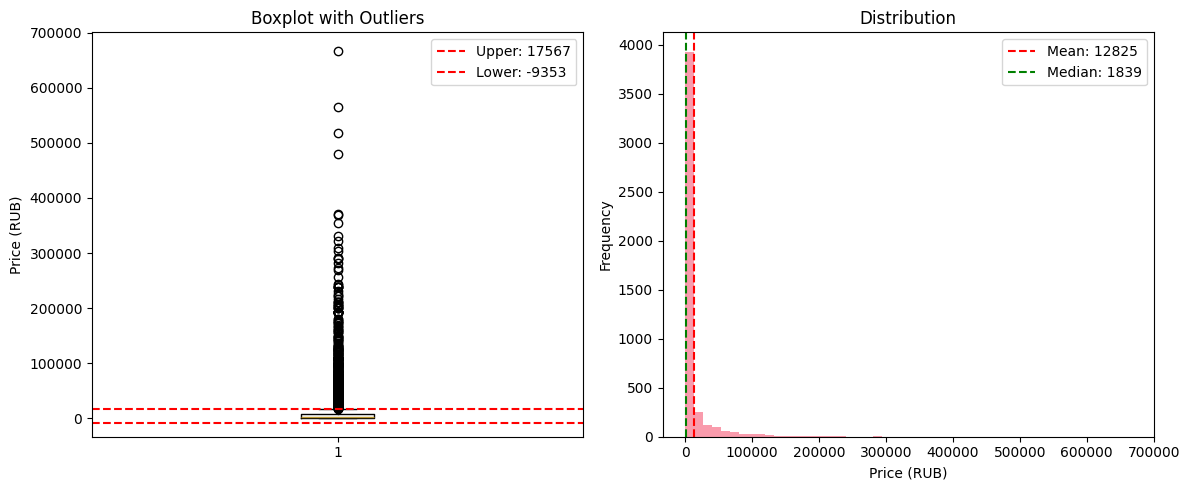

In [ ]:
# Boxplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.axhline(upper, color='r', linestyle='--', label=f'Upper: {upper:.0f}')
plt.axhline(lower, color='r', linestyle='--', label=f'Lower: {lower:.0f}')
# statistically we don't have lower bound outliers, why ? because we can't have price which less than 0 (price < 0 ?)
# however in real pov, we can't have zero price, so we have only upper bound of outliers, we gotta ignore -9353
# lower = max(0, q1 - 1.5 * iqr)

plt.ylabel('Price (RUB)')
plt.title('Boxplot with Outliers')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(data, bins=50, alpha=0.7)
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.0f}')
plt.axvline(median, color='g', linestyle='--', label=f'Median: {median:.0f}')
plt.xlabel('Price (RUB)')
plt.ylabel('Frequency')
plt.title('Distribution')
plt.legend()

plt.tight_layout()
plt.show()

## Task A3: Missing Data (1.0 pts)

In [ ]:
# A3: Check missing values
print("Missing values:")
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

# Introduce 5% missing in seller_rating
df_copy = df.copy()
target = 'seller_rating'
original = df_copy[target].copy()

idx = df_copy[target].dropna().sample(frac=0.05, random_state=42).index # that why we have only 5% = 235 records
df_copy.loc[idx, target] = np.nan

print(f"\nIntroduced missing: {df_copy[target].isnull().sum()}")
print(f"Original mean: {original.mean():.4f}")
print(f"Original std: {original.std():.4f}") # too low outliers , in ang rating of sellers between ( 4.6-4.9 )

Missing values:
brand         869
seller_id    1997
dtype: int64

Introduced missing: 235
Original mean: 4.7258
Original std: 0.1659


In [8]:
# Method 1: Constant (0)
df1 = df_copy.copy()
df1[target].fillna(0, inplace=True)
print(f"Constant - Mean: {df1[target].mean():.4f}, Std: {df1[target].std():.4f}")

# Method 2: Mean
df2 = df_copy.copy()
df2[target] = SimpleImputer(strategy='mean').fit_transform(df2[[target]])
print(f"Mean - Mean: {df2[target].mean():.4f}, Std: {df2[target].std():.4f}")

# Method 3: KNN
df3 = df_copy.copy()
cols = ['price_rub', 'seller_rating', 'seller_total_sold', 'seller_age_months', 'feedbacks']
cols = [c for c in cols if c in df3.columns]
df3[cols] = KNNImputer(n_neighbors=5).fit_transform(df3[cols])
print(f"KNN - Mean: {df3[target].mean():.4f}, Std: {df3[target].std():.4f}")

Constant - Mean: 4.4896, Std: 1.0425
Mean - Mean: 4.7258, Std: 0.1620
KNN - Mean: 4.7256, Std: 0.1632


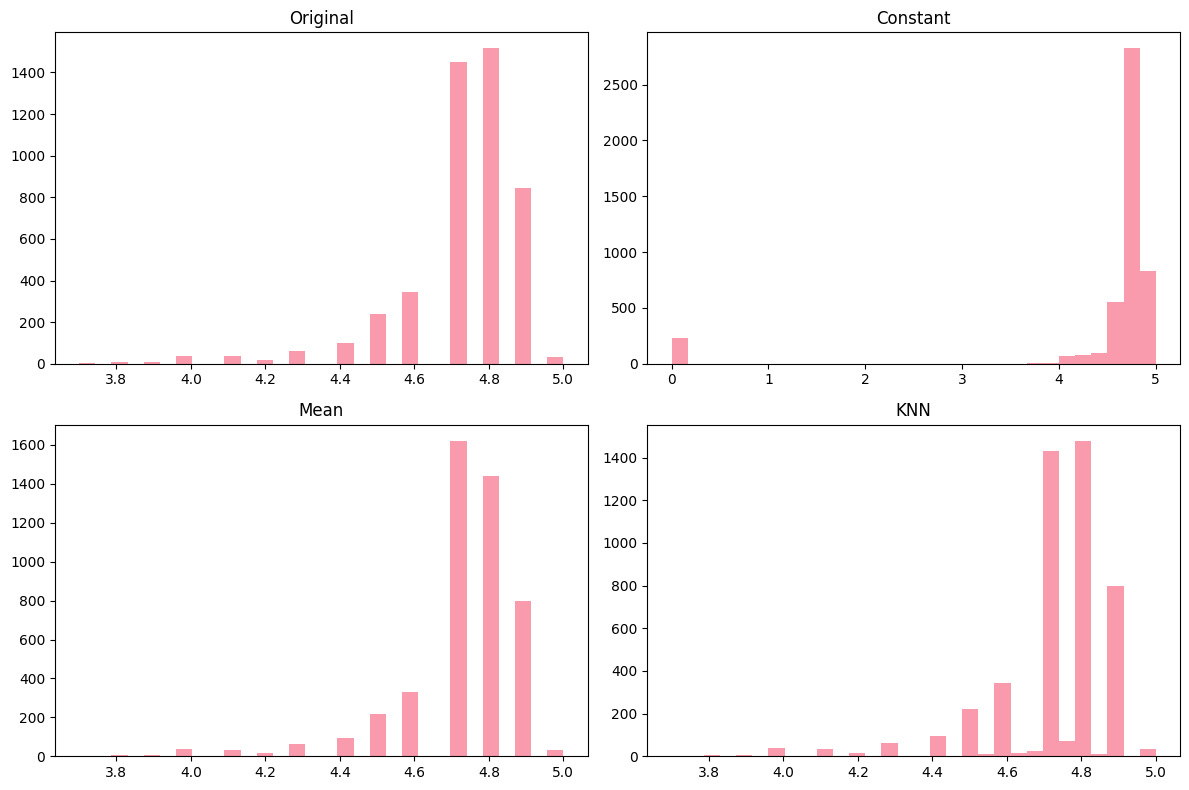


Conclusion:
Constant: Simple but biased
Mean: Preserves mean, reduces variance
KNN: Best preserves distribution


In [9]:
# Compare visually
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0,0].hist(original.dropna(), bins=30, alpha=0.7)
axes[0,0].set_title('Original')
axes[0,1].hist(df1[target], bins=30, alpha=0.7)
axes[0,1].set_title('Constant')
axes[1,0].hist(df2[target], bins=30, alpha=0.7)
axes[1,0].set_title('Mean')
axes[1,1].hist(df3[target], bins=30, alpha=0.7)
axes[1,1].set_title('KNN')

plt.tight_layout()
plt.show()

print("\nConclusion:")
print("Constant: Simple but biased")
print("Mean: Preserves mean, reduces variance")
print("KNN: Best preserves distribution")

## Task B1: Normalization & Standardization (1.5 pts)

In [10]:
# B1: Scale two features
f1 = 'price_rub'
f2 = 'seller_total_sold'
df_clean = df[[f1, f2]].dropna()

print(f"{f1}: [{df_clean[f1].min():.2f}, {df_clean[f1].max():.2f}]")
print(f"{f2}: [{df_clean[f2].min():.0f}, {df_clean[f2].max():.0f}]")

# Min-Max [0,1]
df_minmax = df_clean.copy()
df_minmax[[f1, f2]] = MinMaxScaler().fit_transform(df_clean[[f1, f2]])
print(f"\nMin-Max: {f1} → [{df_minmax[f1].min():.4f}, {df_minmax[f1].max():.4f}]")

# Z-score
df_zscore = df_clean.copy()
df_zscore[[f1, f2]] = StandardScaler().fit_transform(df_clean[[f1, f2]])
print(f"Z-score: {f1} → mean={df_zscore[f1].mean():.4f}, std={df_zscore[f1].std():.4f}")

price_rub: [0.00, 667162.00]
seller_total_sold: [0, 3667059]

Min-Max: price_rub → [0.0000, 1.0000]
Z-score: price_rub → mean=-0.0000, std=1.0001


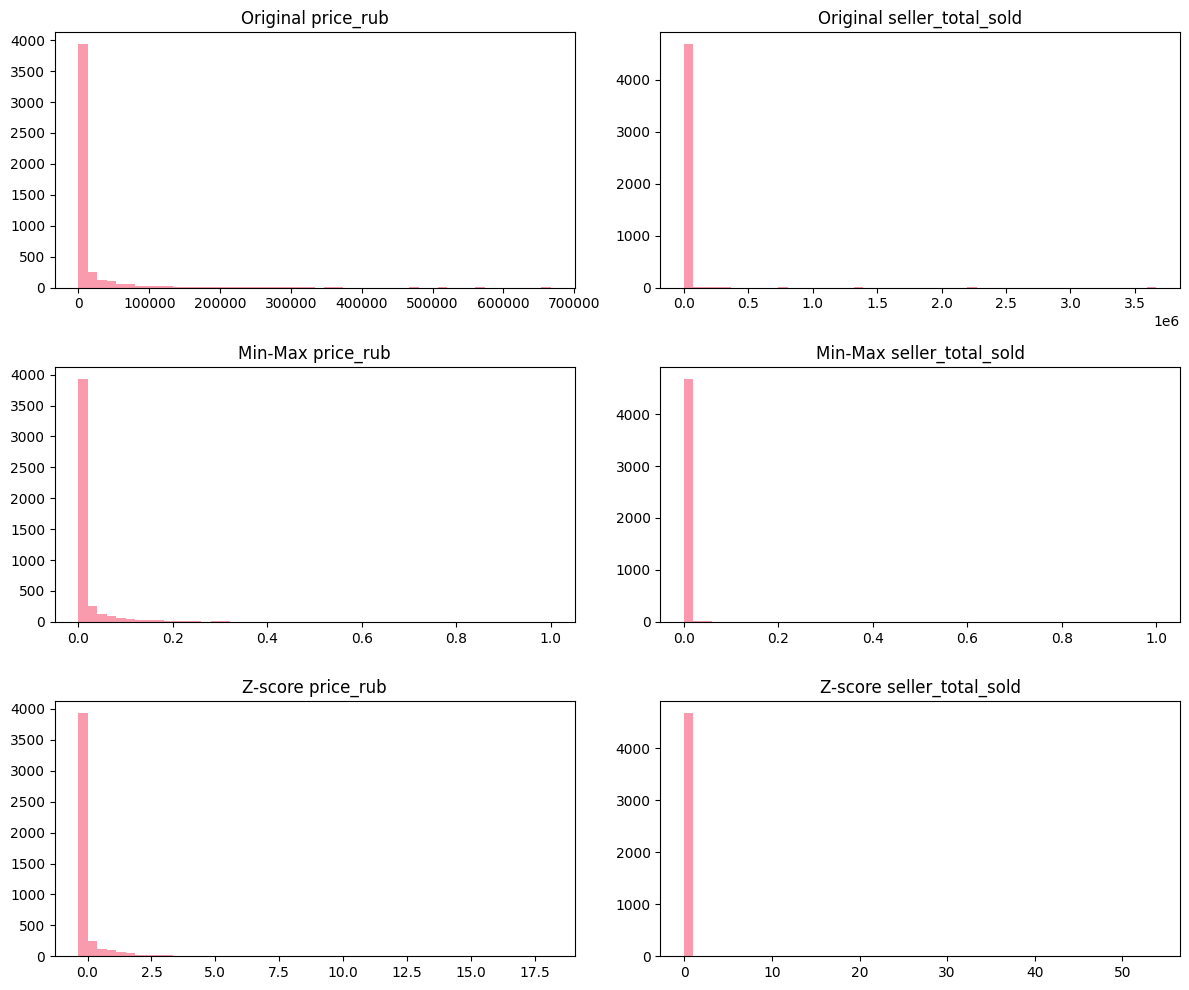

When to use:
Min-Max: Neural nets, bounded values needed
Z-score: Linear models, SVM, PCA


In [11]:
# Plot before/after
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

axes[0,0].hist(df_clean[f1], bins=50, alpha=0.7)
axes[0,0].set_title(f'Original {f1}')
axes[0,1].hist(df_clean[f2], bins=50, alpha=0.7)
axes[0,1].set_title(f'Original {f2}')

axes[1,0].hist(df_minmax[f1], bins=50, alpha=0.7)
axes[1,0].set_title(f'Min-Max {f1}')
axes[1,1].hist(df_minmax[f2], bins=50, alpha=0.7)
axes[1,1].set_title(f'Min-Max {f2}')

axes[2,0].hist(df_zscore[f1], bins=50, alpha=0.7)
axes[2,0].set_title(f'Z-score {f1}')
axes[2,1].hist(df_zscore[f2], bins=50, alpha=0.7)
axes[2,1].set_title(f'Z-score {f2}')

plt.tight_layout()
plt.show()

print("When to use:")
print("Min-Max: Neural nets, bounded values needed")
print("Z-score: Linear models, SVM, PCA")

## Task B2: Feature Engineering (1.5 pts)

In [12]:
# B2: Create new features
df_feat = df.copy()

# Feature 1
df_feat['price_per_feedback'] = df_feat['price_rub'] / (df_feat['feedbacks'] + 1)
print(f"price_per_feedback: mean={df_feat['price_per_feedback'].mean():.2f}")

# Feature 2
df_feat['seller_reputation'] = df_feat['seller_rating'] * np.log1p(df_feat['seller_total_sold'])
print(f"seller_reputation: mean={df_feat['seller_reputation'].mean():.2f}")

# Feature 3
df_feat['is_new_seller'] = (df_feat['seller_age_months'] < 12).astype(int)
print(f"is_new_seller: {df_feat['is_new_seller'].value_counts().to_dict()}")

price_per_feedback: mean=9990.72
seller_reputation: mean=12.87
is_new_seller: {0: 3600, 1: 1102}


In [13]:
# Discretization
col = 'price_rub'

# Equal-width
df_feat['price_ew'], bins_w = pd.cut(df_feat[col], bins=3, labels=['low','medium','high'], retbins=True)
print("Equal-width bins:", bins_w)
print(df_feat['price_ew'].value_counts())

# Equal-frequency
df_feat['price_ef'], bins_f = pd.qcut(df_feat[col], q=3, labels=['low','medium','high'], retbins=True, duplicates='drop')
print("\nEqual-freq bins:", bins_f)
print(df_feat['price_ef'].value_counts())

Equal-width bins: [  -667.162      222387.33333333 444774.66666667 667162.        ]
price_ew
low       4675
medium      23
high         4
Name: count, dtype: int64

Equal-freq bins: [     0.    939.   4902. 667162.]
price_ef
high      1568
low       1567
medium    1567
Name: count, dtype: int64


In [14]:
# One-hot encoding
cat_col = 'category'
encoded = pd.get_dummies(df_feat[cat_col], prefix='cat')
print(f"One-hot: {len(encoded.columns)} columns created")
print(encoded.head())

One-hot: 143 columns created
   cat_Unknown Category  cat_flash-накопители  cat_адаптеры  \
0                 False                 False         False   
1                 False                 False         False   
2                 False                 False         False   
3                 False                 False         False   
4                 False                 False         False   

   cat_аккумуляторы для камер  cat_аккумуляторы для смарт-часов  cat_береты  \
0                       False                             False       False   
1                       False                             False       False   
2                       False                             False       False   
3                       False                             False       False   
4                       False                             False       False   

   cat_бомберы  cat_браслеты для часов  cat_брелоки-локаторы  \
0        False                   False               

## Task C1: Sampling (2.0 pts)

In [15]:
# C1: Sampling analysis
attrs = ['price_rub', 'seller_rating', 'feedbacks']
df_samp = df[attrs + ['category']].dropna()
print(f"Working with {len(df_samp)} records")

def stats(data, attrs):
    result = {}
    for a in attrs:
        result[a] = {
            'mean': data[a].mean(),
            'median': data[a].median(),
            'var': data[a].var(),
            'iqr': data[a].quantile(0.75) - data[a].quantile(0.25)
        }
    return result

# Full stats
full = stats(df_samp, attrs)
for a in attrs:
    print(f"{a}: mean={full[a]['mean']:.2f}, iqr={full[a]['iqr']:.2f}")

Working with 4702 records
price_rub: mean=12824.75, iqr=6730.00
seller_rating: mean=4.73, iqr=0.10
feedbacks: mean=363.19, iqr=19.00


In [16]:
# Sample 1: SRS 10%
srs = df_samp.sample(frac=0.1, random_state=42)
srs_stats = stats(srs, attrs)
print(f"\nSRS ({len(srs)} records):")
for a in attrs:
    delta = srs_stats[a]['mean'] - full[a]['mean']
    print(f"{a}: mean={srs_stats[a]['mean']:.2f} (Δ{delta:+.2f})")


SRS (470 records):
price_rub: mean=12948.79 (Δ+124.04)
seller_rating: mean=4.72 (Δ-0.01)
feedbacks: mean=128.31 (Δ-234.89)


In [17]:
# Sample 2: Stratified by category
strat = df_samp.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))
strat_stats = stats(strat, attrs)
print(f"\nStratified ({len(strat)} records):")
for a in attrs:
    delta = strat_stats[a]['mean'] - full[a]['mean']
    print(f"{a}: mean={strat_stats[a]['mean']:.2f} (Δ{delta:+.2f})")


Stratified (459 records):
price_rub: mean=11376.63 (Δ-1448.12)
seller_rating: mean=4.72 (Δ-0.01)
feedbacks: mean=202.53 (Δ-160.66)


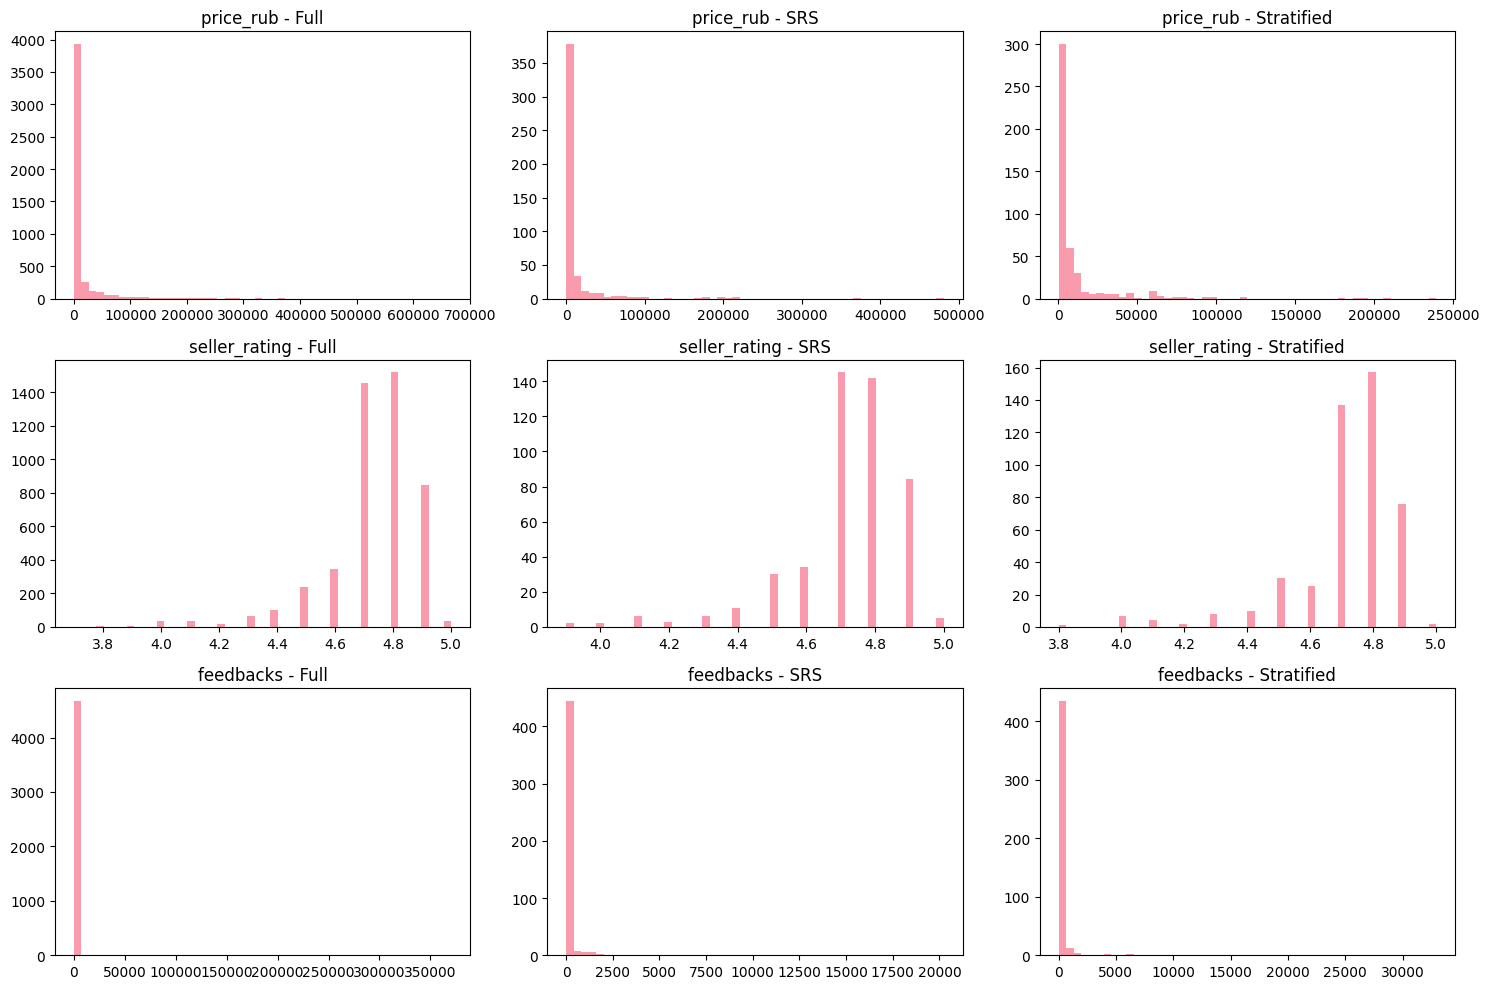

In [18]:
# Compare distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i, a in enumerate(attrs):
    axes[i,0].hist(df_samp[a], bins=50, alpha=0.7)
    axes[i,0].set_title(f'{a} - Full')
    
    axes[i,1].hist(srs[a], bins=50, alpha=0.7)
    axes[i,1].set_title(f'{a} - SRS')
    
    axes[i,2].hist(strat[a], bins=50, alpha=0.7)
    axes[i,2].set_title(f'{a} - Stratified')

plt.tight_layout()
plt.show()

In [19]:
# Calculate preservation score
def score(sample, full, attrs):
    errors = []
    for a in attrs:
        e = abs(sample[a]['mean'] - full[a]['mean']) / full[a]['mean']
        errors.append(e)
    return np.mean(errors)

srs_score = score(srs_stats, full, attrs)
strat_score = score(strat_stats, full, attrs)

print(f"\nPreservation scores (lower=better):")
print(f"SRS: {srs_score:.4f}")
print(f"Stratified: {strat_score:.4f}")
print(f"\nBest: {'Stratified' if strat_score < srs_score else 'SRS'}")


Preservation scores (lower=better):
SRS: 0.2192
Stratified: 0.1857

Best: Stratified


In [20]:
# Report
print("""\nREPORT:

1. Best method: Stratified sampling
   - Preserves category proportions
   - Ensures minority groups represented
   - Lower variance in estimates

2. Outlier detection:
   - 10% sample captures fewer outliers
   - Stratified better for rare categories
   - IQR bounds less stable in samples

3. Data quality:
   - Both methods maintain quality
   - Stratified more balanced
   - SRS has higher variance

4. Recommendations:
   - Use SRS: homogeneous data, quick EDA
   - Use Stratified: distinct subgroups, minority classes
   - For fraud detection: Stratified by risk_level
""")


REPORT:

1. Best method: Stratified sampling
   - Preserves category proportions
   - Ensures minority groups represented
   - Lower variance in estimates

2. Outlier detection:
   - 10% sample captures fewer outliers
   - Stratified better for rare categories
   - IQR bounds less stable in samples

3. Data quality:
   - Both methods maintain quality
   - Stratified more balanced
   - SRS has higher variance

4. Recommendations:
   - Use SRS: homogeneous data, quick EDA
   - Use Stratified: distinct subgroups, minority classes
   - For fraud detection: Stratified by risk_level



## Phase 1 Complete ✅
